In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


NameError: name 'df' is not defined

In [4]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt

#start date
start = dt.datetime(2015,1,1)
#last data point to download      
end = dt.datetime(2020,1,1) 

#symbol
symbol = 'TSLA' 

##source of the data
source = 'yahoo'

df = web.DataReader(symbol, source, start, end)[["Close"]]

,Close
Date,
2019-12-24,85.050003
2019-12-26,86.188004
2019-12-27,86.075996
2019-12-30,82.940002
2019-12-31,83.666000


In [65]:
df = pd.read_csv("Data/TSLA.csv")
df.shape

(2610, 7)

In [66]:
df["Date"] = pd.to_datetime(df["Date"], infer_datetime_format=True)

In [67]:
training_set = df[df["Date"] < "01/01/2019"][["Close"]]
test_set = df[(df["Date"] >= "01/01/2019") & (df["Date"] < "01/01/2020")][["Close"]]

In [68]:
#feature scaling
sc = MinMaxScaler(feature_range =(0,1))
training_set_scaled = sc.fit_transform(training_set)

#creating a datastructure with 60 time-steps
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [69]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
#adding a fifth LSTM layer and some dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
740/740 [==============================] - 4s 6ms/step - loss: 0.0019
Epoch 2/100
740/740 [==============================] - 3s 4ms/step - loss: 5.2433e-04
Epoch 3/100
740/740 [==============================] - 3s 4ms/step - loss: 4.7081e-04
Epoch 4/100
740/740 [==============================] - 3s 4ms/step - loss: 3.7665e-04
Epoch 5/100
740/740 [==============================] - 3s 4ms/step - loss: 3.7724e-04
Epoch 6/100
740/740 [==============================] - 3s 4ms/step - loss: 3.8116e-04
Epoch 7/100
740/740 [==============================] - 3s 4ms/step - loss: 3.3067e-04
Epoch 8/100
740/740 [==============================] - 3s 4ms/step - loss: 2.7794e-04
Epoch 9/100
740/740 [==============================] - 3s 4ms/step - loss: 3.1681e-04
Epoch 10/100
740/740 [==============================] - 3s 4ms/step - loss: 4.2102e-04
Epoch 11/100
740/740 [==============================] - 3s 4ms/step - loss: 6.9002e-04
Epoch 12/100
740/740 [==============================] - 

740/740 [==============================] - 3s 4ms/step - loss: 2.7934e-04
Epoch 96/100
740/740 [==============================] - 3s 4ms/step - loss: 1.8724e-04
Epoch 97/100
740/740 [==============================] - 3s 4ms/step - loss: 2.1319e-04
Epoch 98/100
740/740 [==============================] - 3s 4ms/step - loss: 2.0094e-04
Epoch 99/100
740/740 [==============================] - 3s 4ms/step - loss: 1.5253e-04
Epoch 100/100
740/740 [==============================] - 3s 4ms/step - loss: 1.4541e-04


In [70]:
# Getting the predicted stock price of 2017
dataset_train = df[df["Date"] < "01/01/2019"][["Close"]]
dataset_test = df[(df["Date"] >= "01/01/2019") & (df["Date"] < "01/01/2020")][["Close"]]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
print(len(inputs))
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 312):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

312
(252, 60, 1)


In [71]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

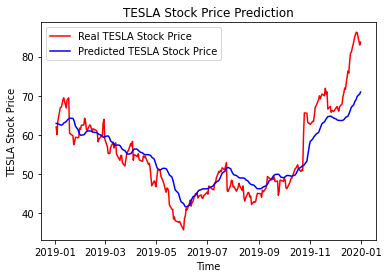

In [94]:
# Visualising the results
plt.plot(df[(df["Date"] >= "01/01/2019") & (df["Date"] < "01/01/2020")][["Date"]],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df[(df["Date"] >= "01/01/2019") & (df["Date"] < "01/01/2020")][["Date"]],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
#plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [88]:
test_values = [x for x in dataset_test.values]
predicted = [x for x in predicted_stock_price]

In [89]:
test_values

[62.023998,
 60.071999,
 63.537997999999995,
 66.991997,
 67.07,
 67.706001,
 68.994003,
 69.452003,
 66.879997,
 68.886002,
 69.209999,
 69.461998,
 60.452,
 59.784,
 57.518002,
 58.301998,
 59.408001,
 59.276001,
 59.492001,
 61.754002,
 61.403999,
 62.442001,
 62.577999,
 64.269997,
 63.444,
 61.501999,
 61.16,
 62.568001,
 62.362,
 61.633998999999996,
 60.754002,
 61.576,
 61.127998,
 60.512001,
 58.245998,
 58.942001,
 59.754002,
 59.571999,
 62.948002,
 63.976002,
 58.958,
 57.071999,
 55.307999,
 55.248001,
 55.318001,
 56.827999,
 58.183997999999995,
 56.672001,
 57.792,
 57.992001,
 55.085999,
 53.897999,
 53.493999,
 54.720001,
 54.804001,
 52.905998,
 52.084,
 53.554001,
 54.966,
 55.723999,
 55.972,
 57.835999,
 57.175999,
 58.362,
 53.556,
 54.992001,
 54.639998999999996,
 54.462002000000005,
 55.212002000000005,
 53.683997999999995,
 53.540001000000004,
 53.276001,
 54.672001,
 54.245998,
 54.652,
 52.549999,
 52.779999,
 51.731998,
 49.526001,
 47.028,
 48.293999,
 47.73

In [91]:
from scipy.stats import pearsonr
corr, _ = pearsonr(test_values, predicted)
print(corr)

0.9313597438198022
